In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from importlib.util import find_spec
if find_spec("core") is None:
    import sys
    sys.path.append('..')

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

tfds.disable_progress_bar()
#tf.config.run_functions_eagerly(True)

In [2]:
from core.networks import resnetfinetune
from core.models.base import WEIGHTS_DIRNAME

Load the best weights for the model

In [3]:
model = resnetfinetune(input_shape = (224, 224, 3), output_shape = (4,))
model.load_weights(os.path.join(WEIGHTS_DIRNAME, 'RetinaModel_RetinaDatasetWrapper_resnetfinetune_weights.h5'))
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                

Get the test data set

In [4]:
from core.datasets import RetinaDatasetWrapper
ds = RetinaDatasetWrapper()
ds.load()
_, _, ds_test = ds.prepare()

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


Get predictions and plot confusion matrix

In [5]:
labels = []
preds = []
for i in ds_test:
    label = i[1].numpy()
    image = i[0]
    pred = model.predict(np.expand_dims(image, axis=0))
    preds.append(np.argmax(pred))
    labels.append(label)
    
_, ds_test_info = tfds.load('RetinaDataset', split='test', shuffle_files=True, as_supervised=True,with_info=True)
label_names = ds_test_info.features['label'].names

<AxesSubplot:>

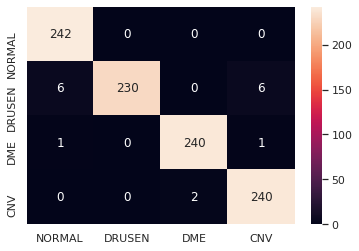

In [6]:
cm = confusion_matrix(labels, preds)
sns.set()
sns.heatmap(cm, annot=True, xticklabels = label_names ,yticklabels = label_names,fmt='g')